In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('Social_NetAd.csv')
print(df.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (280, 2)
X_test shape: (120, 2)
y_train shape: (280,)
y_test shape: (120,)


In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

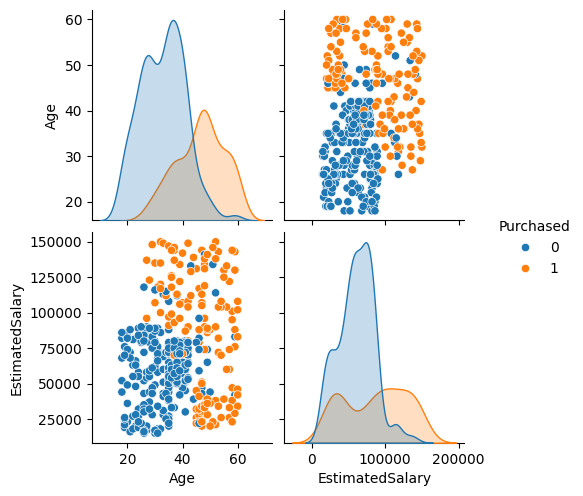

In [5]:
sns.pairplot(df, hue='Purchased')
plt.show()

In [6]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [7]:
classifier = RandomForestClassifier(n_estimators = 280, criterion = 'gini', random_state = 102)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=280, random_state=102)

In [8]:
y_pred = classifier.predict(X_test)

Confusion Matrix:
[[72  7]
 [ 5 36]]
Accuracy: 0.9
Precision: 0.8372093023255814
Recall: 0.8780487804878049


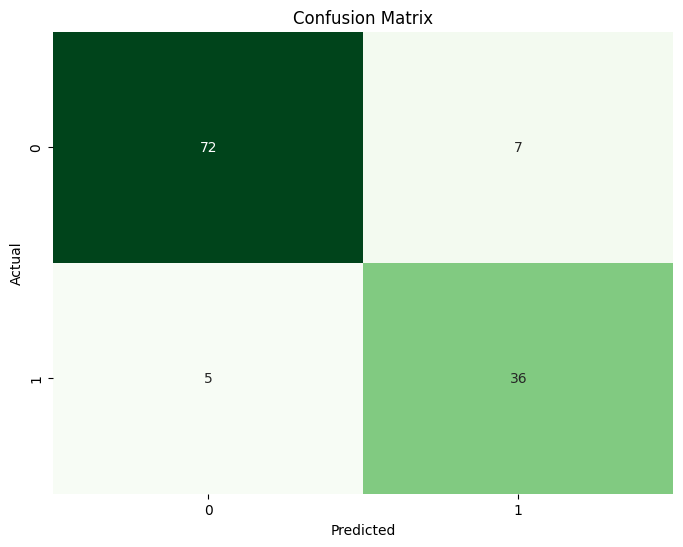

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

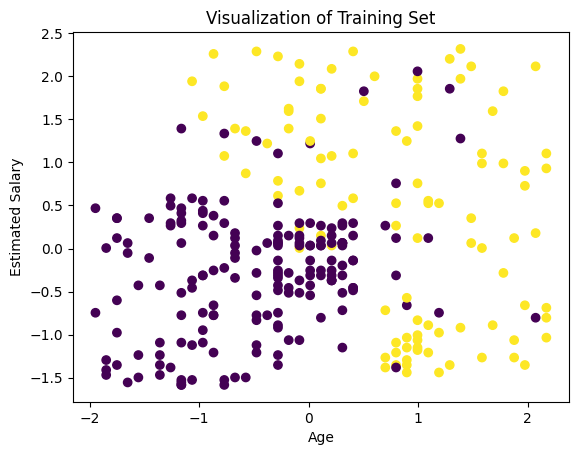

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Visualization of Training Set')
plt.show()

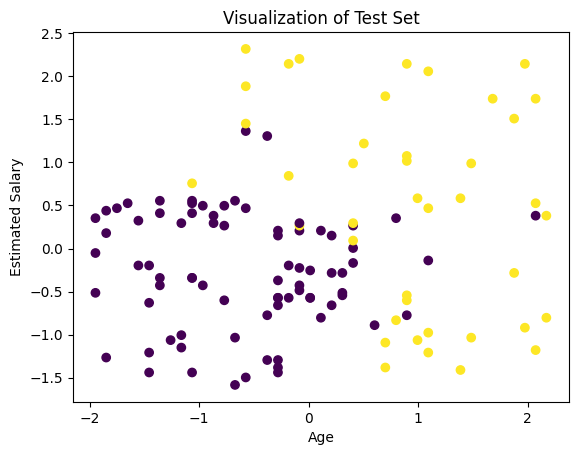

In [13]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Visualization of Test Set')
plt.show()

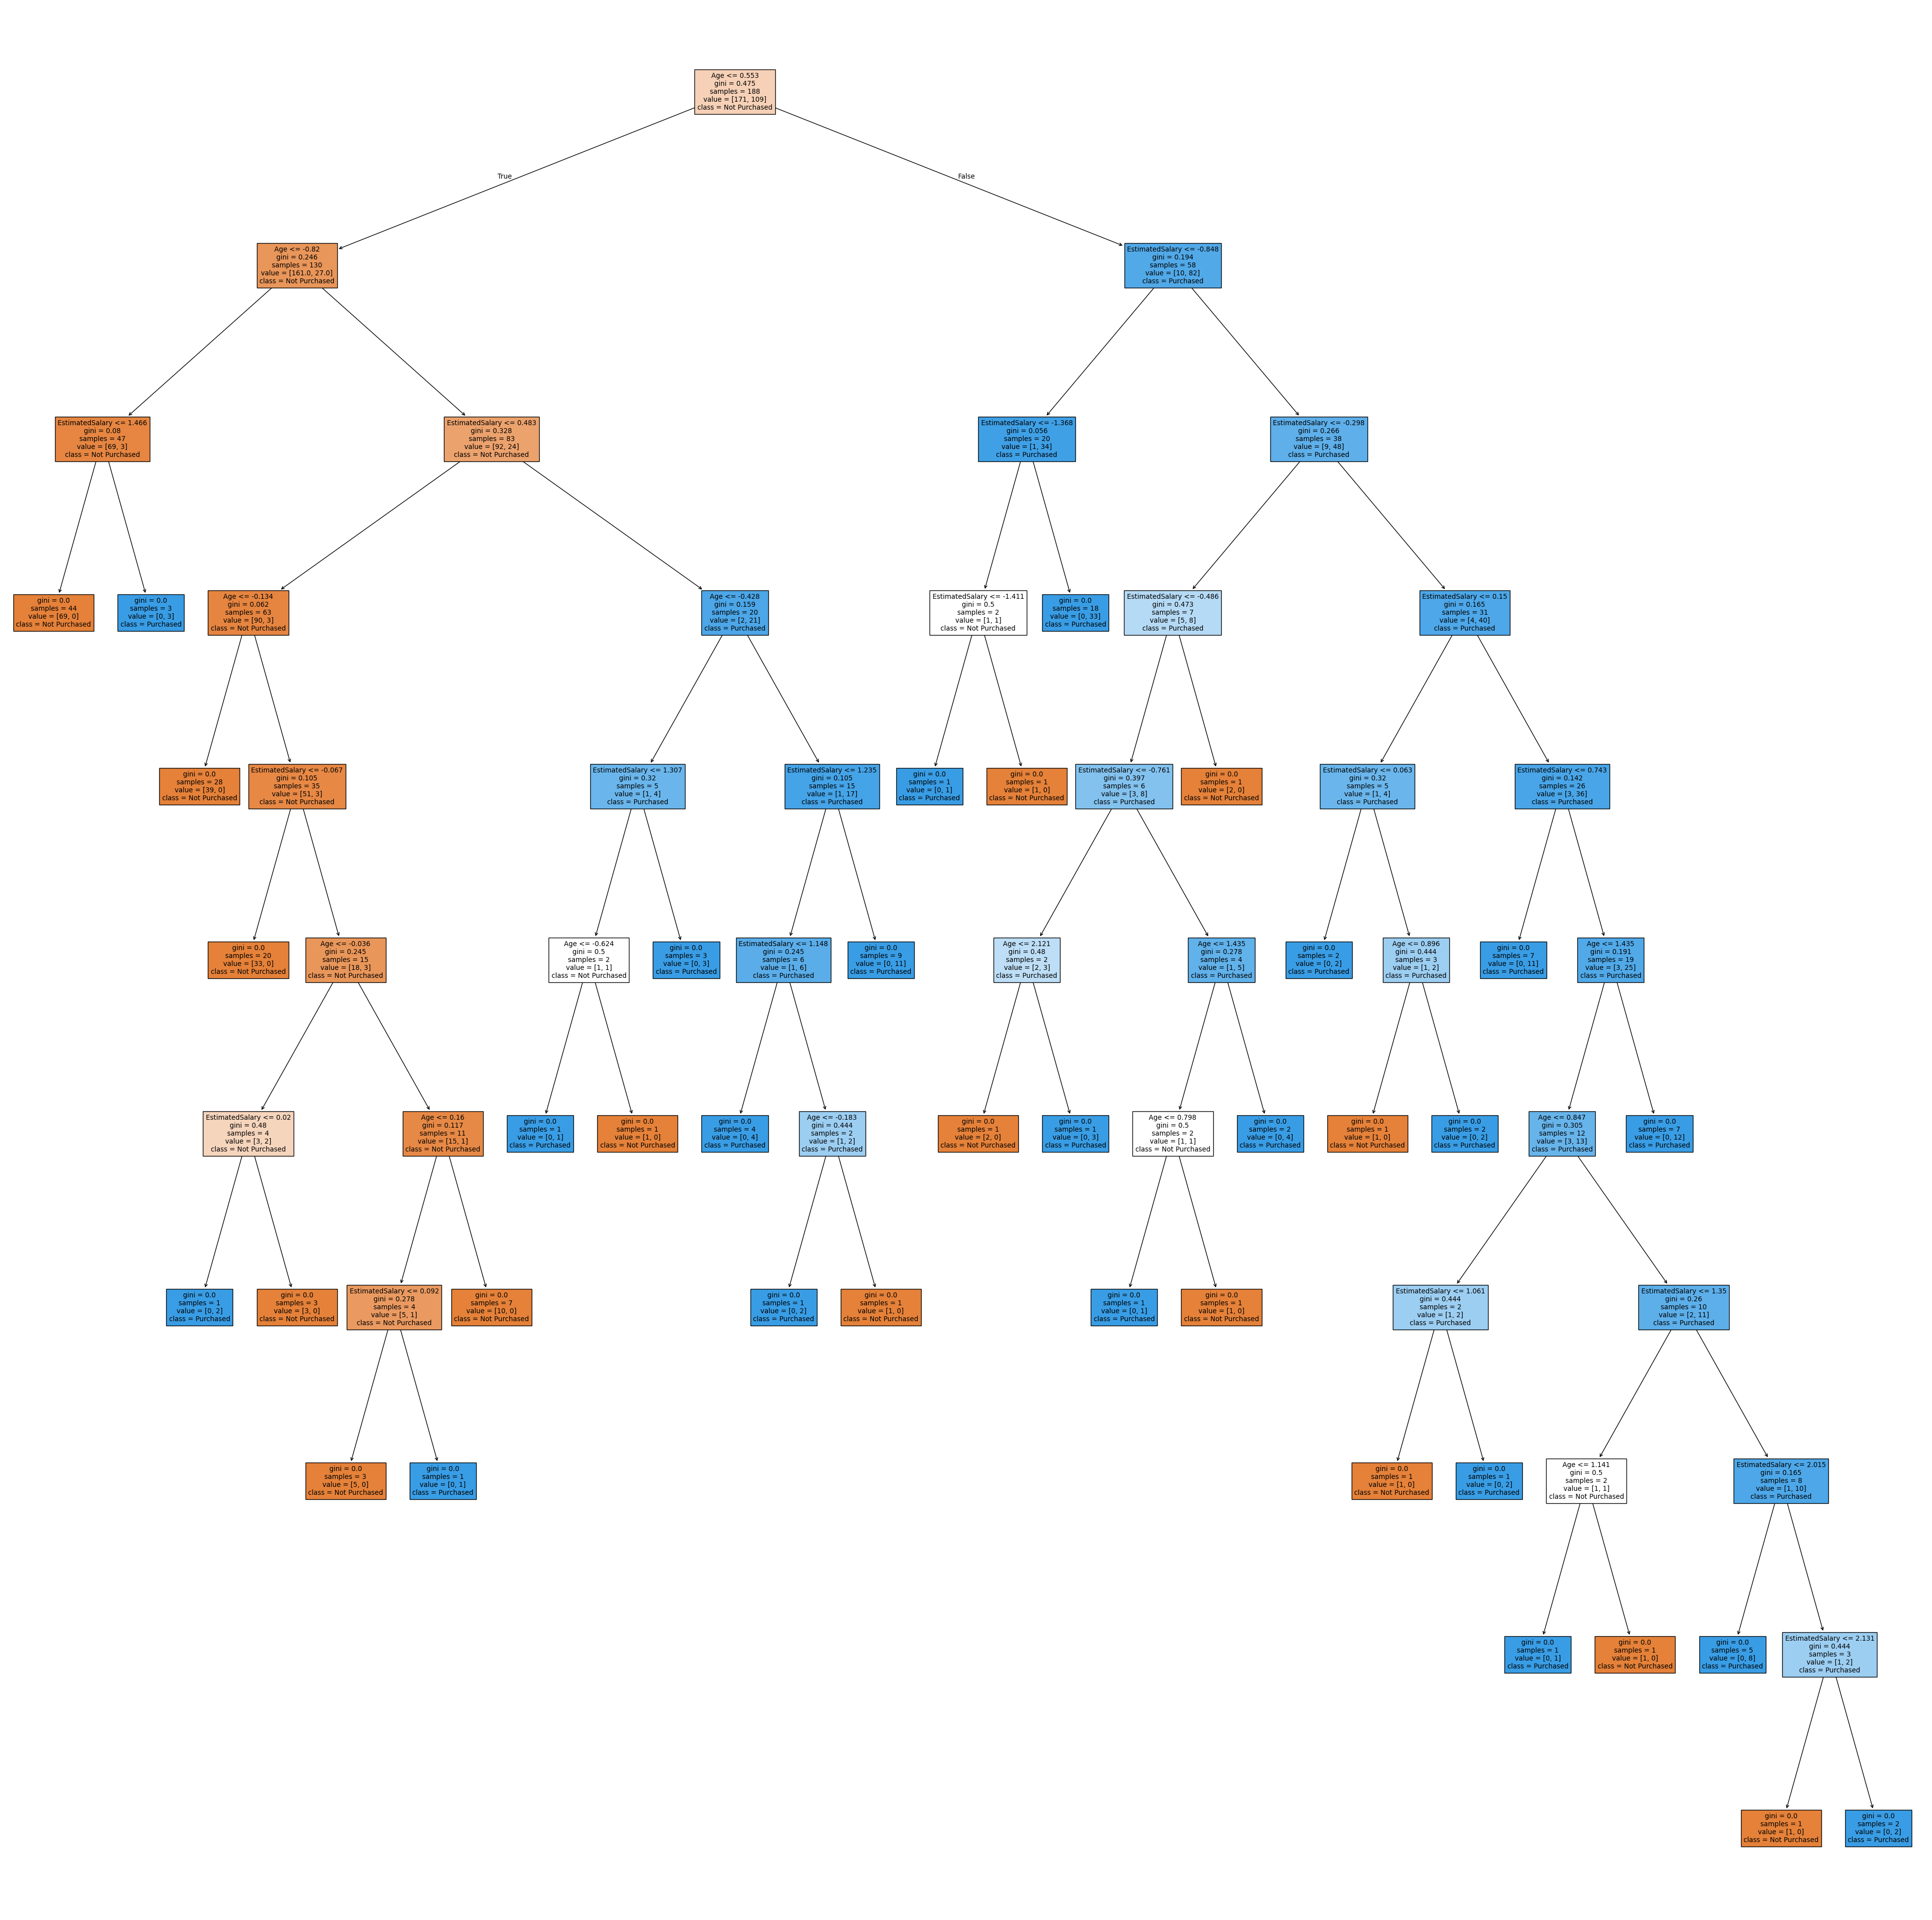

In [12]:
estimator = classifier.estimators_[200]  # Choose one tree from the forest

plt.figure(figsize=(50,50))
plot_tree(estimator, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'])
plt.show()